In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from random import sample
from timeit import default_timer
from typing import  Generator, List, Optional, Tuple


def CalcularDistancia(matriz_distancias: np.ndarray, permutacion: List[int]) -> float:
    """
    Función Objetivo

    Recibe los siguientes parámetros:
    matriz_distancias - Arreglo de numpy bidimensional el cual en la ij-ésima coordenada se encuentra el costo de ir del lugar i al lugar j
    permutacion - Lista simple la cuál contiene una permutación de las ciudades de la cual se quiere saber su costo de visitar las ciudades en el orden que presenta

    Regresa:
    Un flotante el cuál indica el precio de realizar el recorrido de las ciudades en el orden de la lista permutación
    """
    lugares1 = permutacion
    lugares2 = permutacion[1:] + permutacion[:1]
    return matriz_distancias[lugares1, lugares2].sum()
def SolucionInicial(matriz_distancias: np.ndarray) -> Tuple:
    """
    Solución Inicial

    Recibe los siguientes parámetros:
    matriz_distancias - Arreglo de numpy bidimensional el cual en la ij-ésima coordenada se encuentra el costo de ir del lugar i al lugar j

    Regresa:

    En forma de tupla son regresados los siguientes elementos.
    x0 - Permutación aleatoria de las ciudades con la ciudad 0 como primera entrada
    fx0 - Función Objetivo evaluada en la solución inicial
    """
    n = matriz_distancias.shape[0]
    x0 = [0] + sample(range(1, n), n - 1)
    fx0 = CalcularDistancia(matriz_distancias, x0)
    return x0, fx0
def generador_2_OPT(x: List[int]) -> Generator:
    """
    Generador 2 OPT

    Recibe los siguientes parámetros:
    x - Lista la cual contiene una permutación de ciudades

    Regresa:

    xn - Un objeto iterable o bien Generador el cual genera todas las operaciones 2-OPT posibles en un orden aleatorio y cada transformación sobre llamada del generador
    """
    n = len(x)  #Obtiene el tamaño de la trayectoria
    i = range(2, n) #Los candidatos a ser primer punto para aplicar 2-opt, empieza desde 2 puesto que de otra forma mutariamos eligiendo a la ciudad 0 cuando i=1
    for i in sample(i, len(i)):
        j = range(i + 1, n + 1)  #Para cada candidato de punto 1 (i) encuentra los candidatos de punto 2 (j)
        for j in sample(j, len(j)):#Para cada candidato de punto 2 asociado al candidato de punto 1 genera una mutación 2-OPT, nuevamente se ordenan de forma aleatoria
            xn = x.copy()  #Copiamos la solución inicial
            xn = xn[: i - 1] + list(reversed(xn[i - 1: j])) + xn[j:] #Aplicamos la mutación
            yield xn #Regresamos la n-ésima mutación en nuestro conjunto ordenado aleatoriamente
def busqueda_local_TSP(matriz_distancias: np.ndarray,Tiempo_maximo: Optional[float] = None,guardarcaminos: bool = False, sol_inicial: list = None) -> Tuple:
    """

    Búsqueda Local TSP

    Recibe los siguientes parámetros:
    matriz_distancias - Arreglo de numpy bidimensional el cual en la ij-ésima coordenada se encuentra el costo de ir del lugar i al lugar j
    Tiempo_maximo  - Flotante el cuál representa la mayor cantidad de tiempo permitida para la ejecución del algoritmo (Opcional)
    guardarcaminos - Variable Booleana la cual decide si regresar o no el historial de mejorias en forma de caminos predeterminado en False


    Regresa los siguientes elementos en forma de tupla:
    x - Mejor solución encontrada
    fx - Solucion Objetivo evaluada en x
    caminos - Historial de mejoria de la búsqueda local en forma de caminos (Opcional según el parámetro guardarcaminos)
    """
    caminos: List =[]
    if (sol_inicial == None):
      x, fx = SolucionInicial(matriz_distancias)
    else:
      x = sol_inicial ; fx = CalcularDistancia(matriz_distancias, x)
    Tiempo_maximo = Tiempo_maximo or np.inf ;tiempo_transcurrido: float = default_timer()
    parar_antes: bool = False ;mejoria: bool = True
    while (mejoria and (not parar_antes)):
        mejoria = False
        for n_index, xn in enumerate(generador_2_OPT(x)):
            if default_timer() - tiempo_transcurrido > Tiempo_maximo:
                print("Se excedio el tiempo")
                parar_antes = True
                break
            fn = CalcularDistancia(matriz_distancias, xn)
            if fn < fx:
                mejoria = True
                x, fx = xn, fn
                caminos.append((x,fx))
                break
    if guardarcaminos :
        return x,fx,caminos
    return x, fx
def mostrar_camino(puntos_permuta: np.array):
  """
  mostrar_camino

  Recibe los siguientes parámetros:
  puntos_permuta - Puntos en el plano ordenados según la solución encontrada

  Regresa una serie de imágenes con los caminos graficados en el plano
  """
  for i in range(1,len(puntos_permuta)):
    p1 = puntos_permuta[i]
    p2 = puntos_permuta[i-1]
    x, y = [p1[0], p2[0]], [p1[1], p2[1]]
    plt.plot(x,y)
    plt.scatter(x,y)
    plt.grid(True)
  plt.show()
def euclides(x,y):
    """
    euclides

    Recibe 2 puntos y encuentra la distancia euclideana entre ellos
    """
    return  np.linalg.norm(x-y)
def obtener_matriz(ciudades: np.array):
 """
 obtener_matriz

 Recibe:
 ciudades - Arreglo de numpy el cual contiene las ciudades en orden enumerado en forma de coordenadas

 Regresa:
 matriz - Arreglo de numpy bidimensional el cual en la ij-ésima coordenada se encuentra el costo de ir del lugar i al lugar j
 """
 matriz=np.empty([len(ciudades),len(ciudades)])
 for i in range(len(ciudades)):
     for j in range(len(ciudades)):
         matriz[i][j]=euclides(ciudades[i],ciudades[j])
 return matriz
def grafica_minimo(caminos: list, matriz_distancias: np.array):
    """
    Gráfica mínimos

    Recibe:
    caminos - lista generada anteriormente por Búsqueda Local TSP
    matriz_distancias -  Arreglo de numpy bidimensional el cual en la ij-ésima coordenada se encuentra el costo de ir del lugar i al lugar j

    Crea una gráfica de la función objetivo dada la lista de caminos
    """
    x=list(range(0,len(caminos)))
    y=[z[1] for z in caminos]
    plt.scatter(x,y,marker="x", color="red")
    plt.grid(True)
    plt.show()



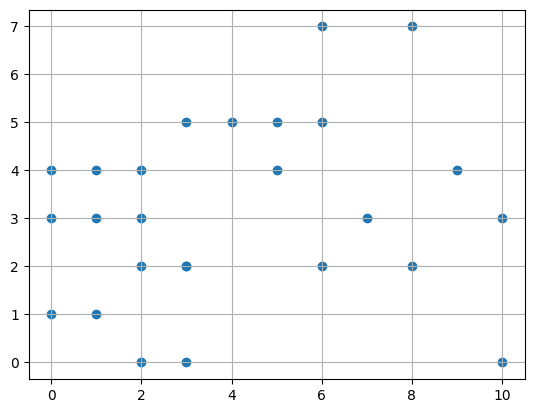

[[ 0.          3.          5.          3.16227766  2.          2.23606798
   2.82842712  8.48528137  3.60555128  7.28010989  8.06225775 10.04987562
   1.          2.23606798  5.65685425  2.23606798  6.08276253 10.19803903
   5.83095189  9.48683298  3.16227766  3.16227766  7.21110255  6.40312424
   3.16227766 10.        ]
 [ 3.          0.          3.16227766  3.60555128  1.          1.41421356
   2.23606798  6.70820393  2.          7.07106781  8.24621125 10.77032961
   3.16227766  2.82842712  4.12310563  4.47213595  6.32455532 10.04987562
   5.          9.          3.60555128  1.          6.08276253  5.09901951
   5.          8.54400375]
 [ 5.          3.16227766  0.          3.          3.60555128  2.82842712
   2.23606798  3.60555128  1.41421356  4.47213595  5.83095189  8.60232527
   4.47213595  3.16227766  1.          5.09901951  4.24264069  7.28010989
   2.23606798  6.08276253  3.          2.23606798  3.          2.
   5.          5.38516481]
 [ 3.16227766  3.60555128  3.          

In [ ]:
ciudades=np.array([[0,1],[0,4],[3,5],[3,2],[0,3],[1,3],[2,3],[6,7],[2,4],[7,3],[8,2],[10,0],[1,1],[2,2],[4,5],[2,0],[6,2],[10,3],[5,4],[9,4],[3,2],[1,4],[6,5],[5,5],[3,0],[8,7]])
plt.scatter([x[0] for x in ciudades],[x[1] for x in ciudades])
plt.grid(True)
plt.show()
matriz=obtener_matriz(ciudades)
print(matriz)

permuta,dis,caminos=busqueda_local_TSP(matriz,guardarcaminos=True)
print(permuta,dis)


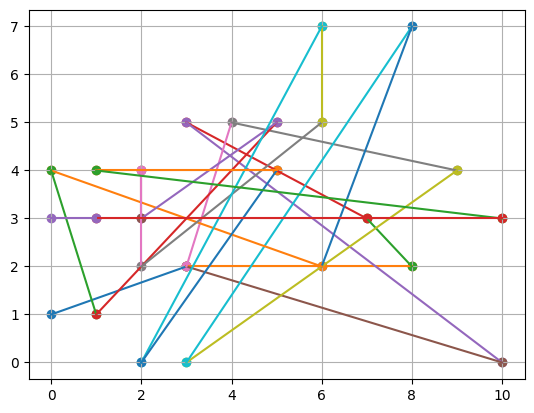

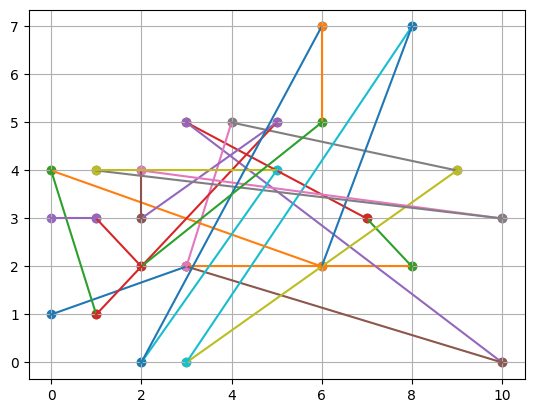

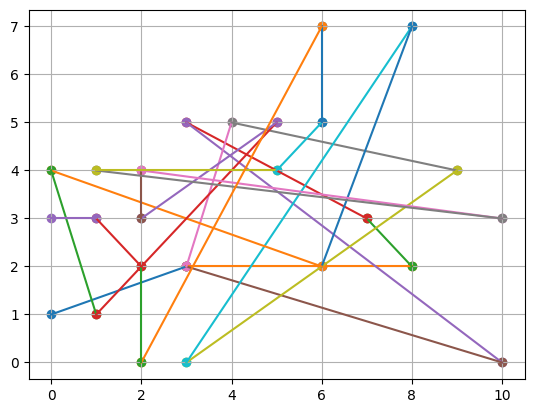

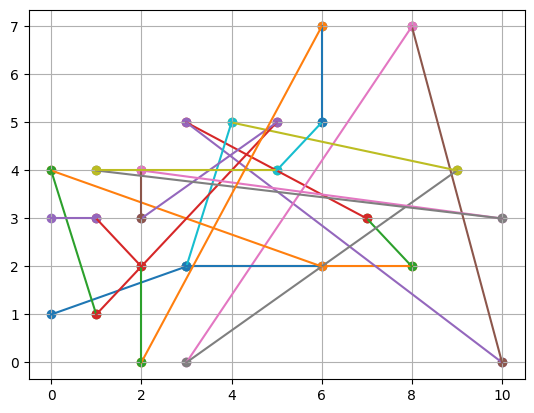

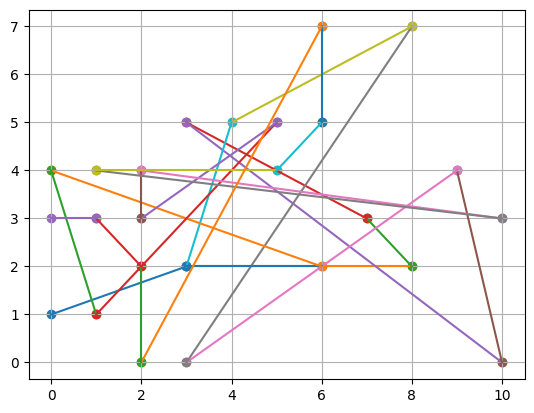

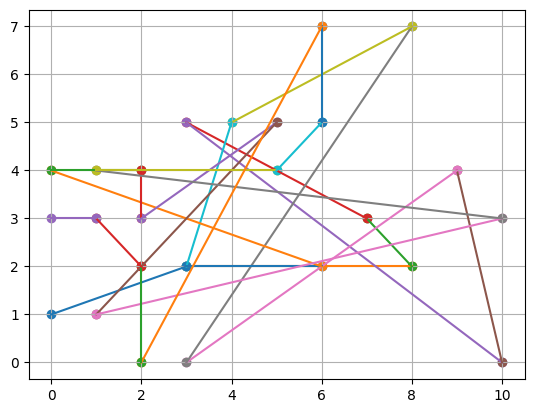

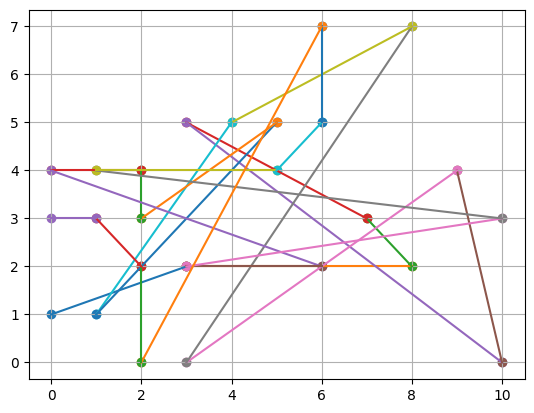

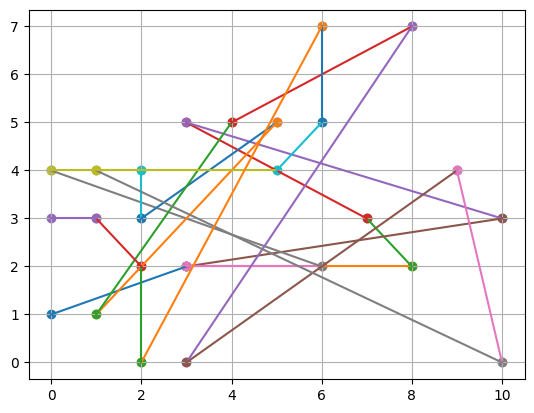

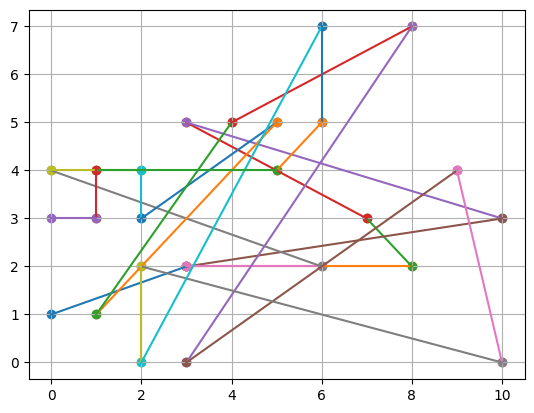

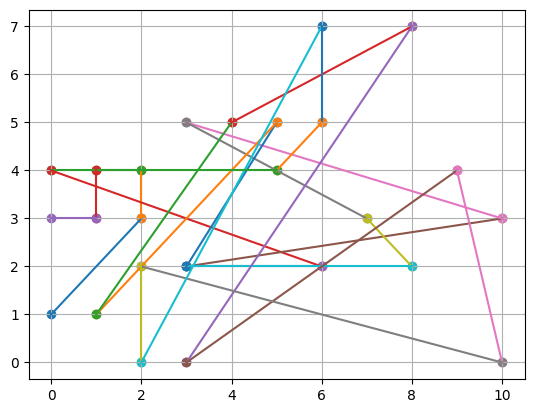

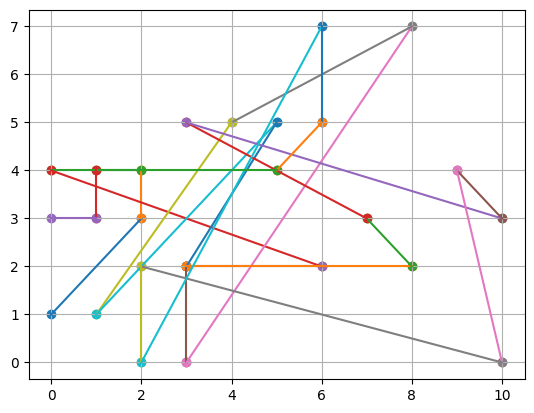

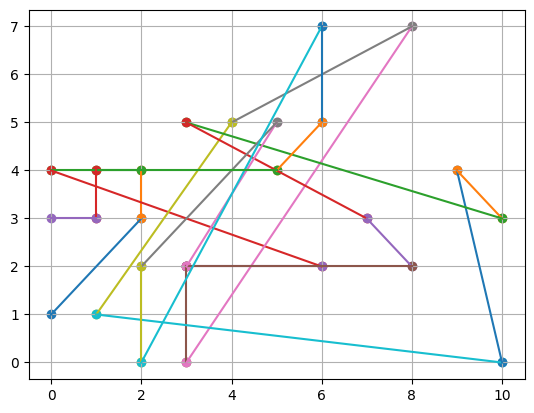

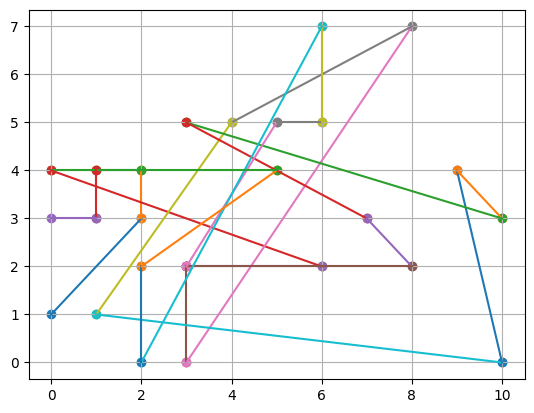

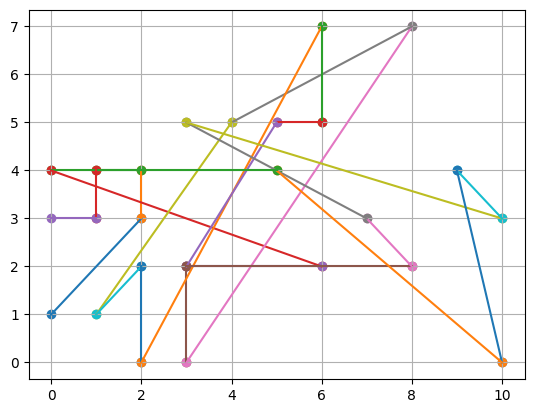

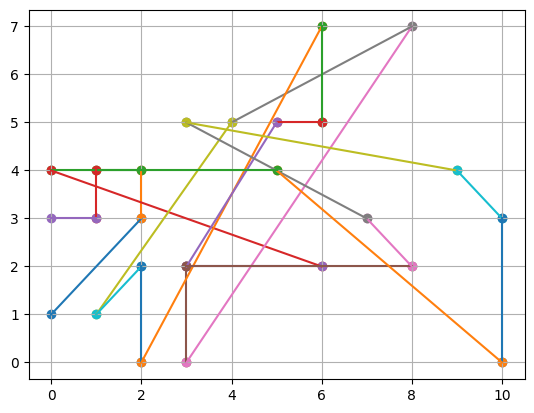

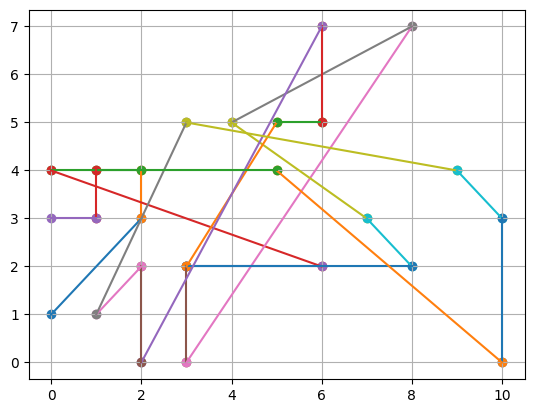

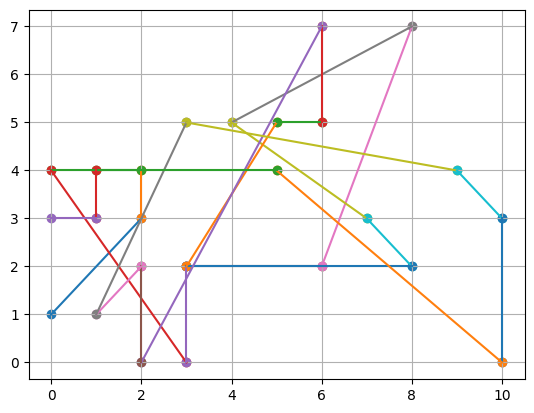

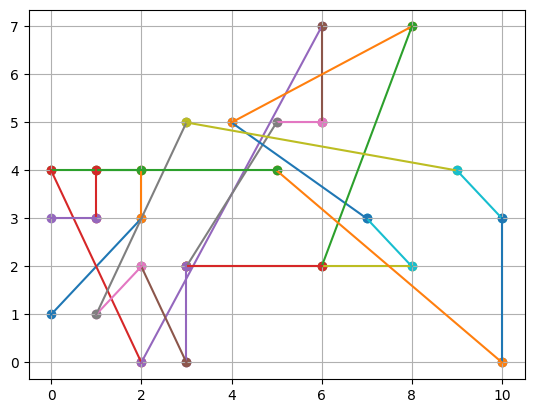

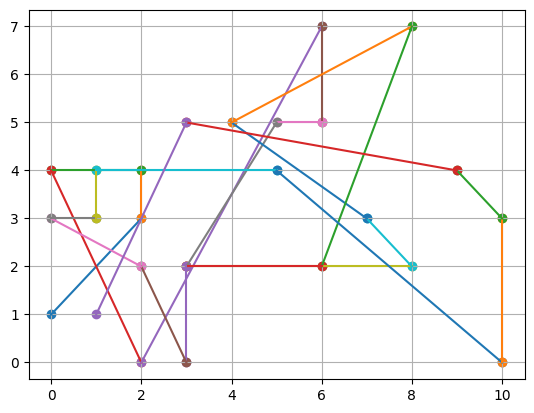

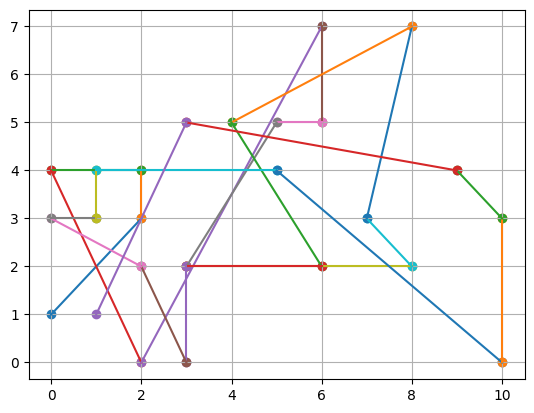

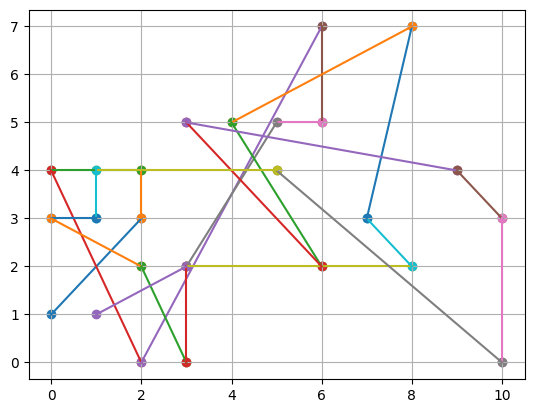

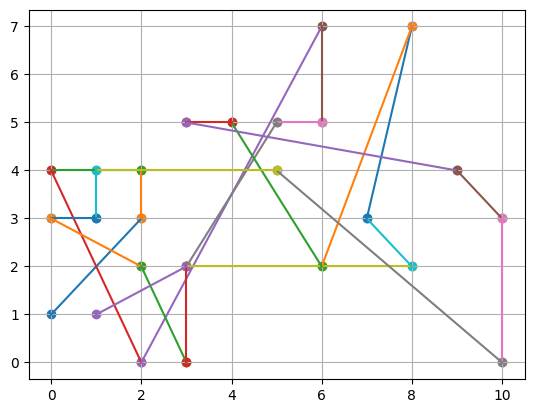

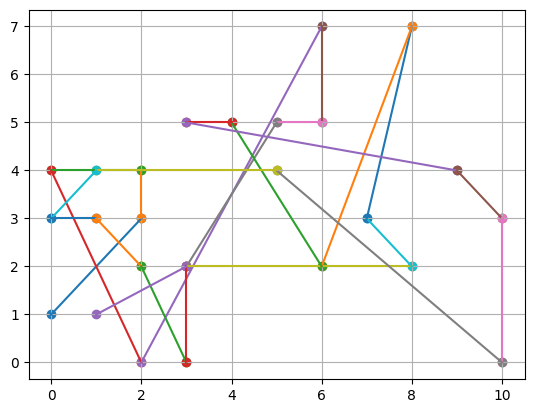

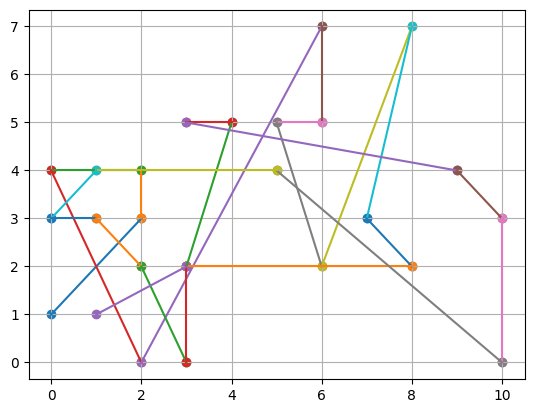

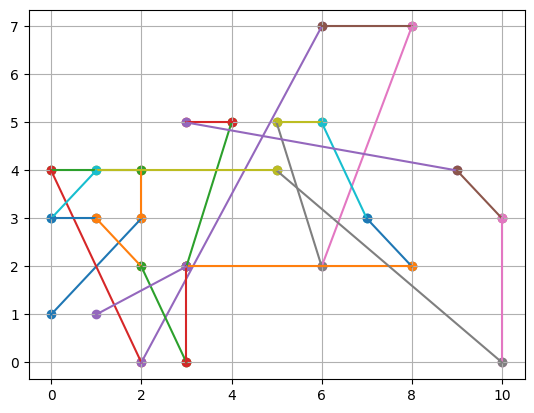

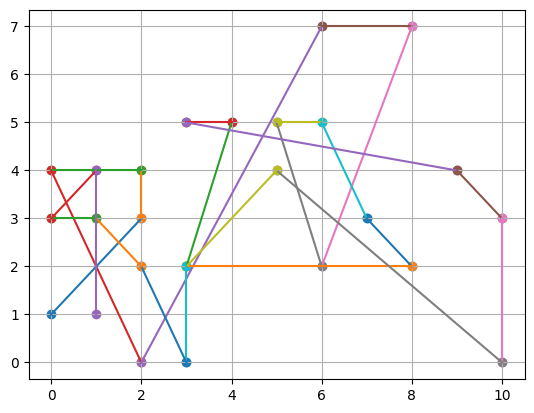

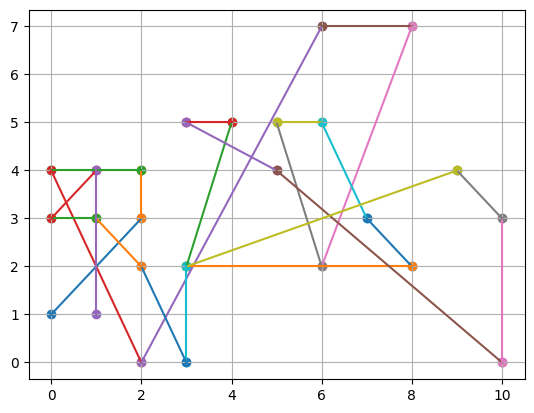

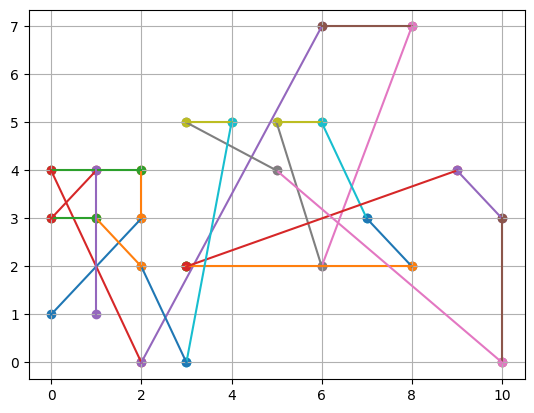

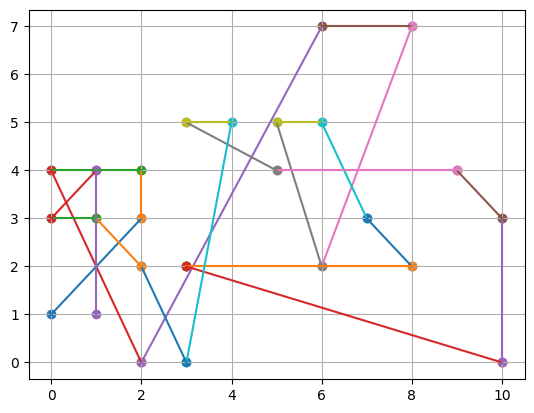

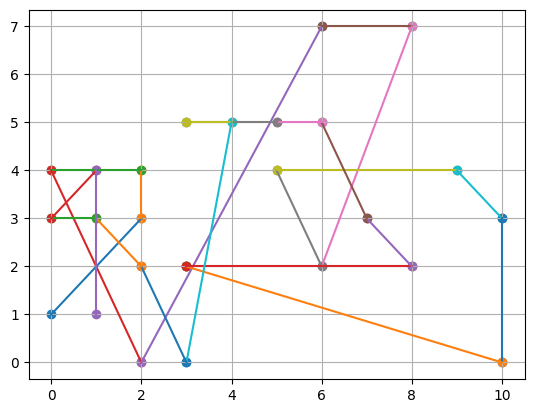

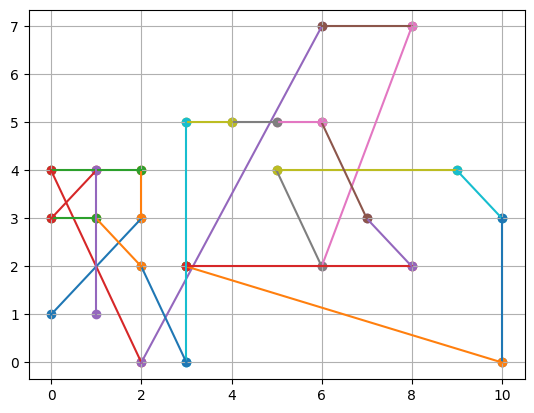

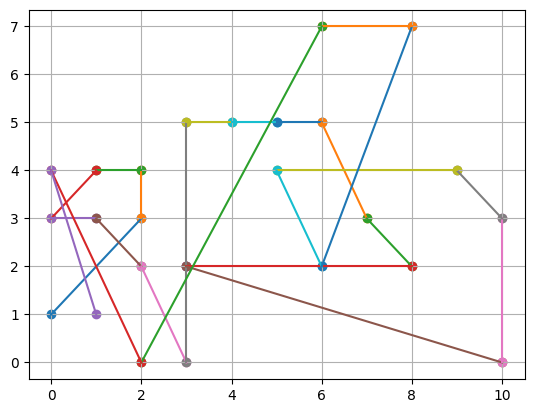

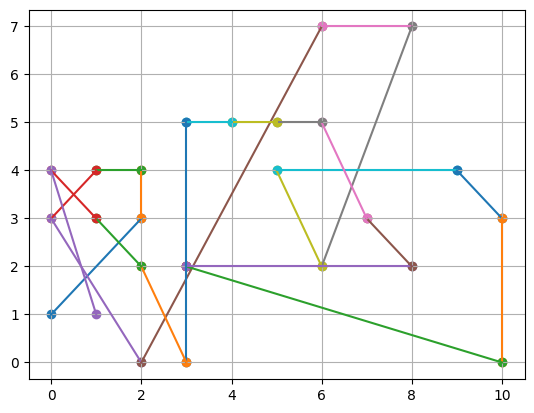

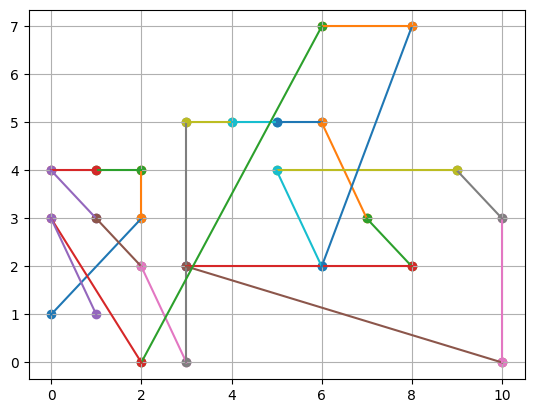

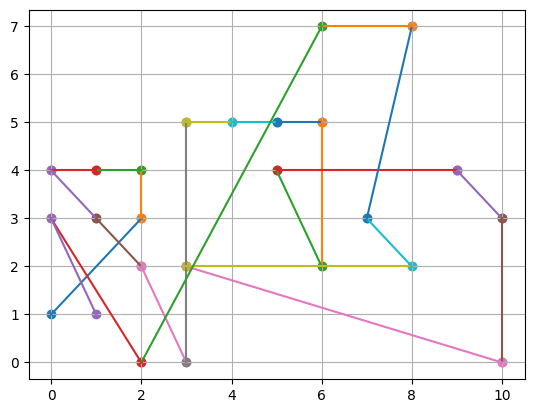

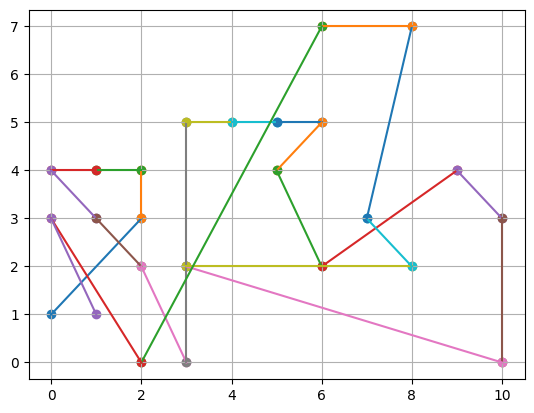

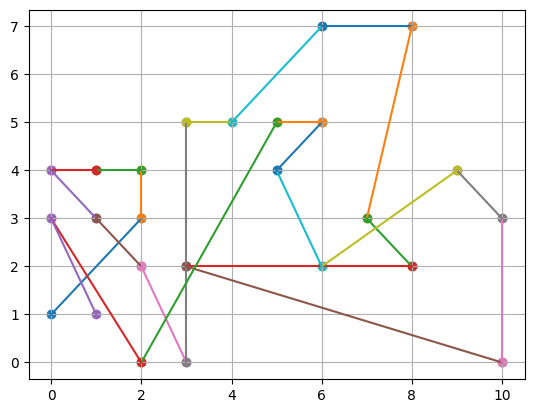

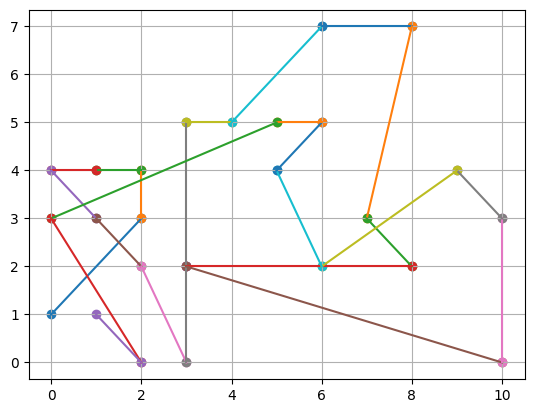

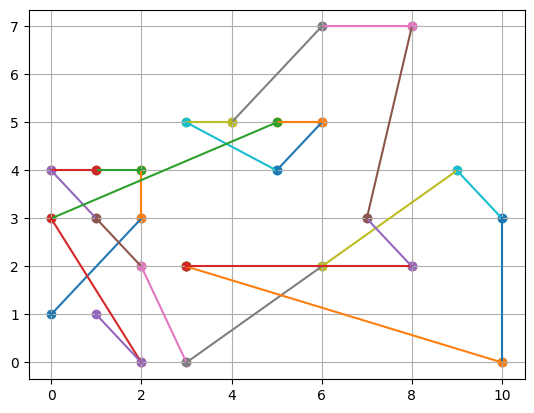

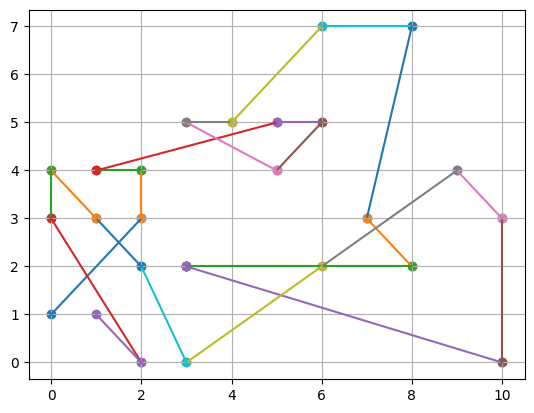

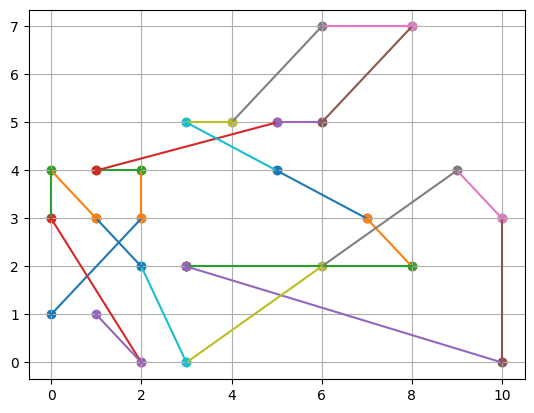

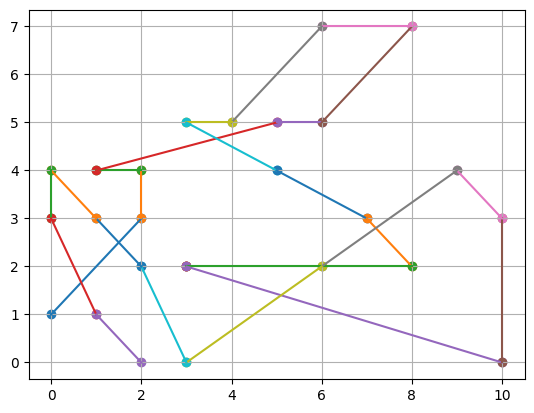

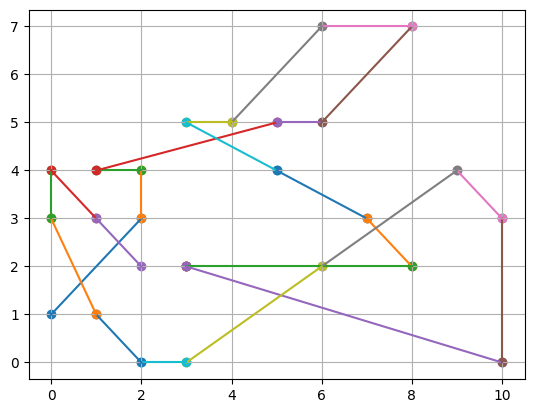

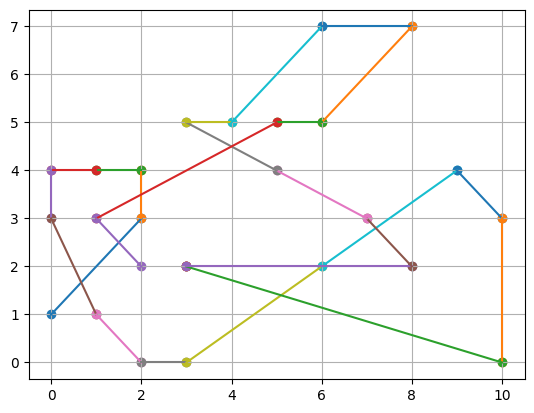

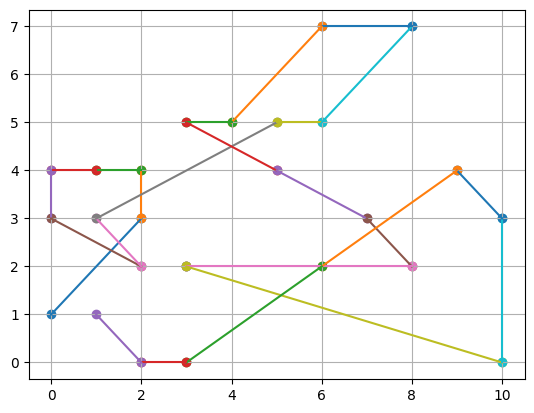

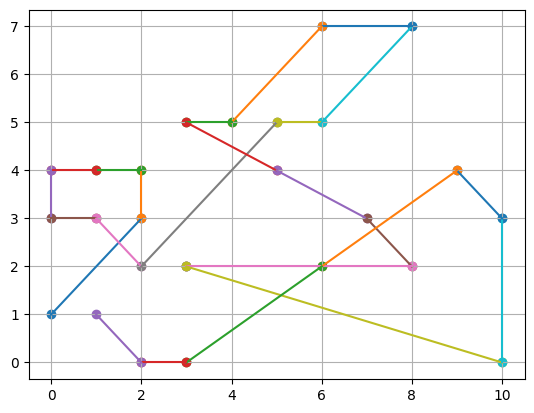

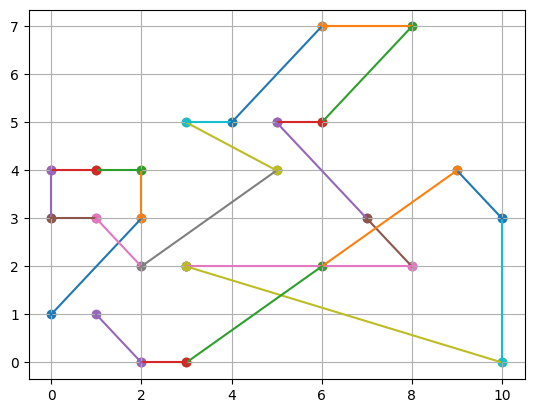

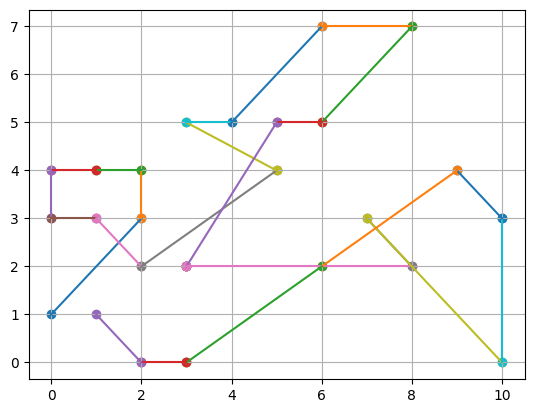

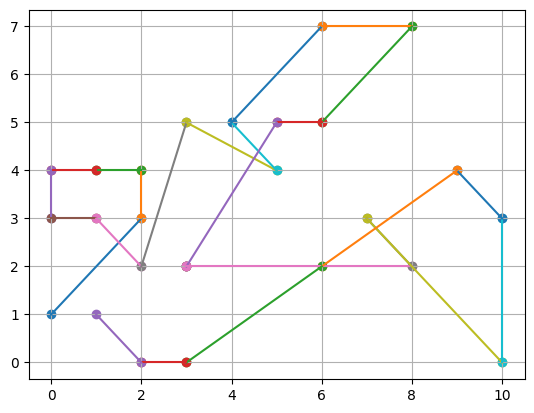

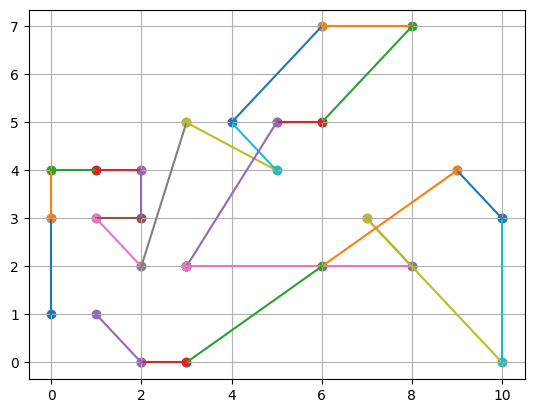

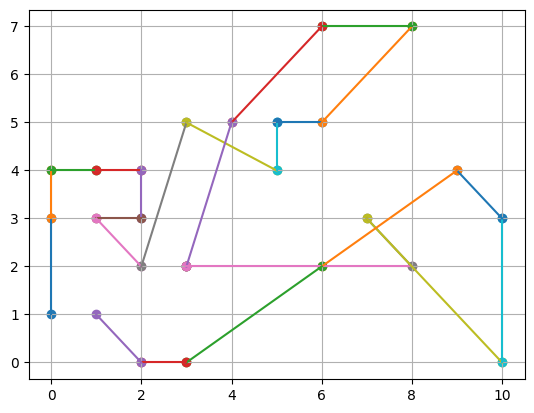

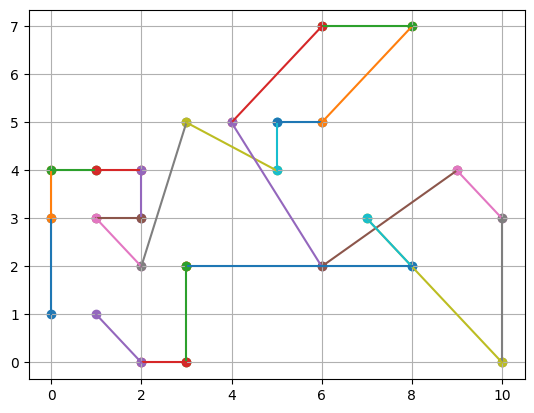

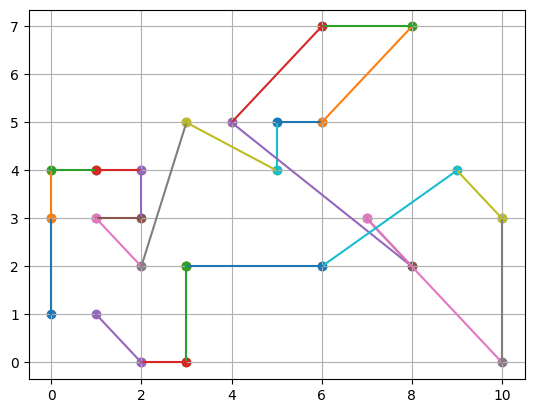

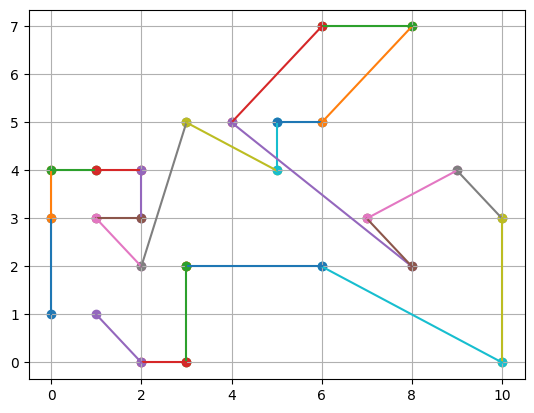

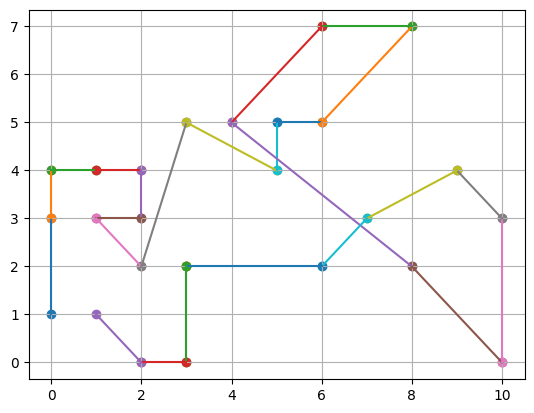

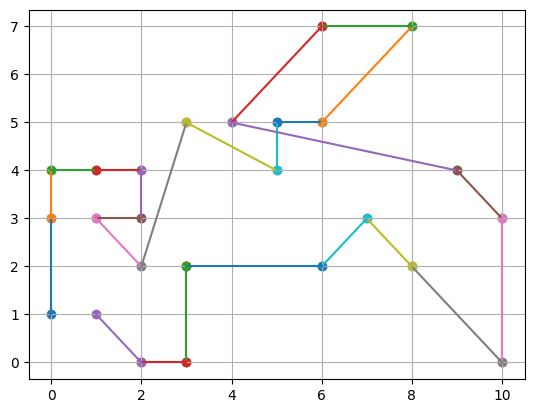

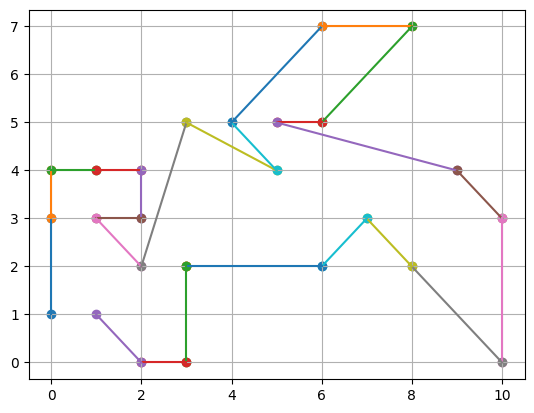

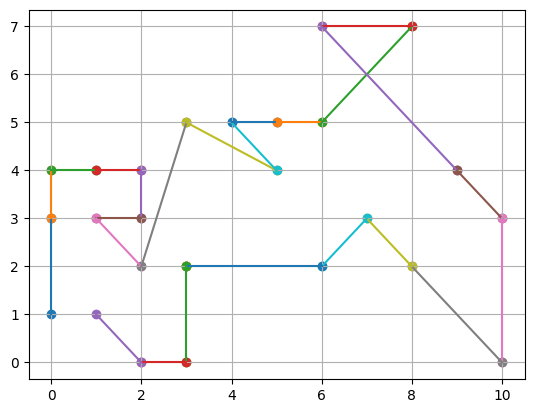

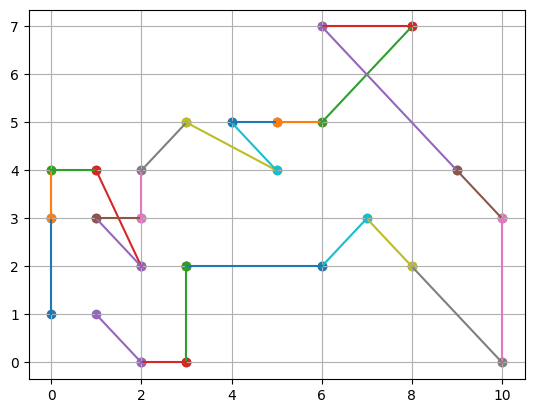

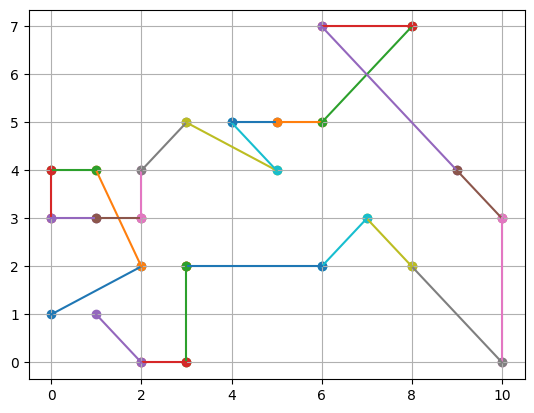

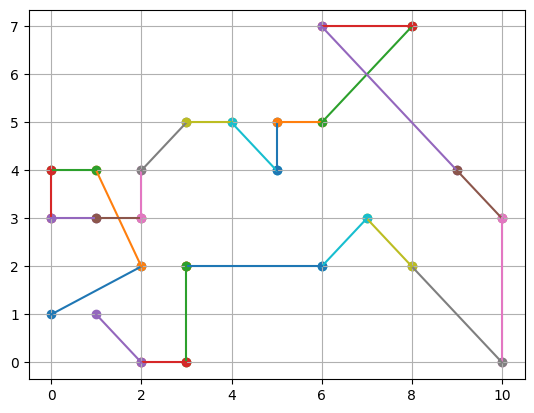

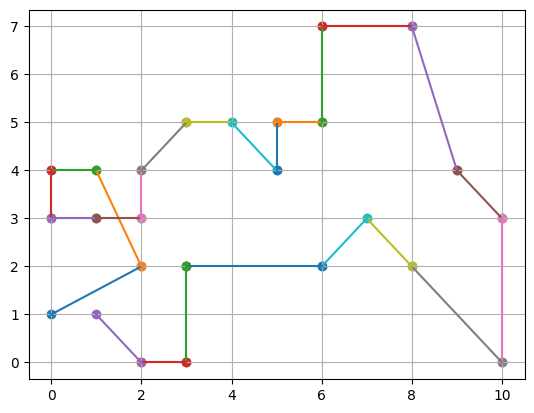

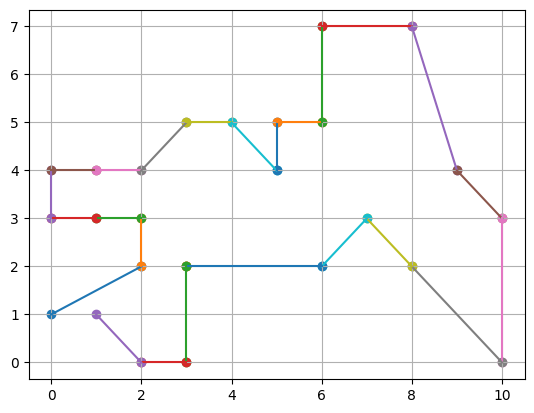

In [ ]:
for i in caminos:
    mostrar_camino(ciudades[i[0]])
puntos_permuta=np.array(ciudades[permuta])


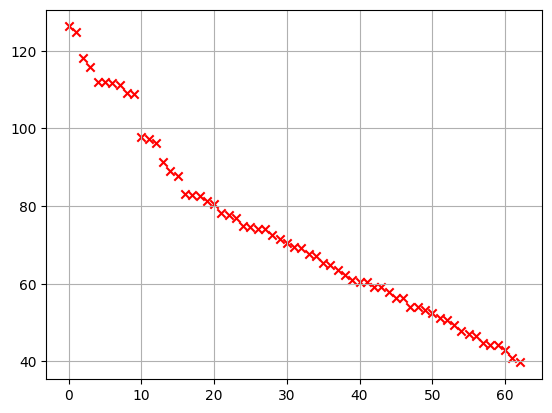

In [ ]:
grafica_minimo(caminos, matriz)